<a href="https://colab.research.google.com/github/Rohanrathod7/my-ds-labs/blob/main/14_Exploratory_Data_Analysis_in_Python/04_Turning_Exploratory_Analysis_into_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [15]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/14_Exploratory_Data_Analysis_in_Python/dataset/salaries.csv"
salaries = pd.read_csv(url)
display(salaries.head())
salaries["date_of_response"] = pd.to_datetime(salaries["date_of_response"])

,Designation,date_of_response,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category,month,weekday
0,Machine Learning Scientist,2020-01-07,SE,FT,20688070.0,JP,JP,S,0.0,248256.840,Machine Learning,1,1
1,Big Data Engineer,2020-09-19,SE,FT,8674985.0,GB,GB,M,50.0,104099.820,Data Engineering,9,5
2,Product Data Analyst,2020-11-21,MI,FT,1591390.0,HN,HN,S,0.0,19096.680,Data Analytics,11,5
3,Machine Learning Engineer,2020-11-29,SE,FT,11935425.0,US,US,L,50.0,143225.100,Machine Learning,11,6
4,Data Analyst,2020-09-07,EN,FT,5729004.0,US,US,L,100.0,68748.048,Data Analytics,9,0


**Checking for class imbalance**  
The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:



In [4]:
# Print the relative frequency of Job_Category
print(salaries["Job_Category"].value_counts(normalize=True))

# Fantastic relative frequency calculation! It looks like Data Science is the most
#  popular class and has a similar representation. Still, the other categories have
#  quite different relative frequencies, which might not be surprising given the target
#  audience is data scientists! Given the difference in relative frequencies, can you
#   trust the salaries DataFrame to accurately represent Managerial roles?

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64


**Cross-tabulation**  
Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

In [5]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


In [10]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

# This is a handy function to examine the combination of frequencies, as well as
# find aggregated statistics. Looks like the largest mean salary is for Managerial data roles in large companies!

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


**Extracting features for correlation**  
In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

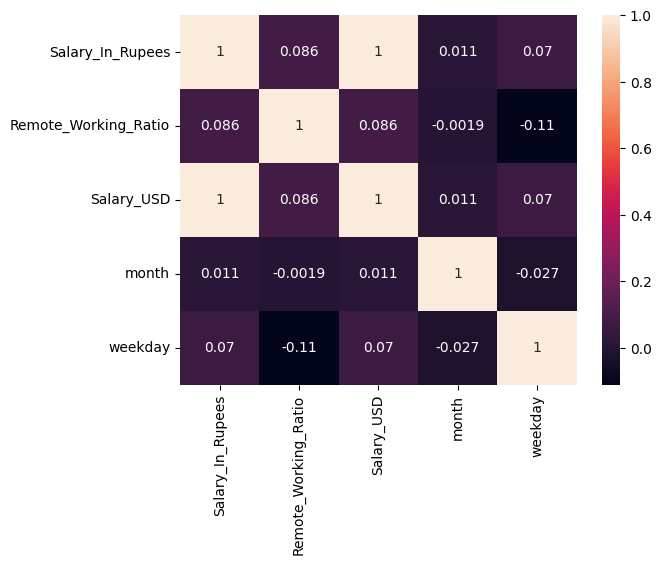

In [16]:
# Convert date_of_response to datetime objects
salaries["date_of_response"] = pd.to_datetime(salaries["date_of_response"])

# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()

**Calculating salary percentiles**  
In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

In [17]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].quantile(0.50)

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)


# Looks like the interquartile range is between 60,881 and 143,225 dollars! Now
# let's use these variables to add a categorical salary column into the DataFrame!

60880.691999999995 97488.552 143225.1


**Categorizing salaries**  
Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

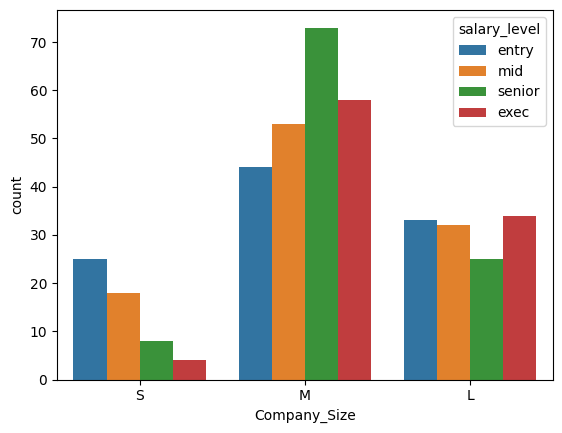

In [18]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

# By using pd.cut() to split out numeric data into categories, you can see that a
# large proportion of workers at small companies get paid "entry" level salaries,
# while more staff at medium-sized companies are rewarded with "senior" level
# salary. Now let's look at generating hypotheses as you reach the end of the EDA phase!

**Comparing salaries**  
Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

The salaries DataFrame has been imported as a pandas DataFrame.

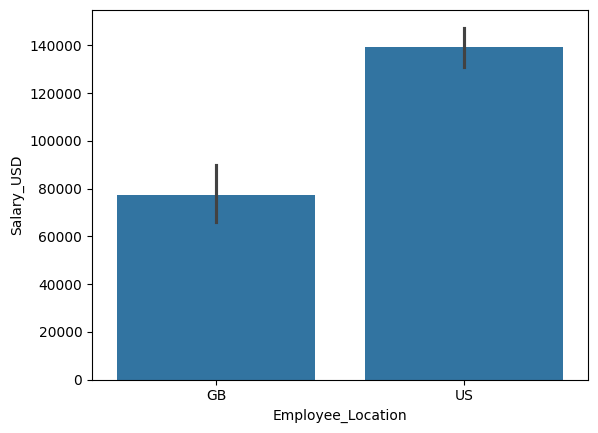

In [19]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

# By subsetting the data you were able to directly compare salaries between the
# USA and Great Britain. The visualization suggests you've generated a hypothesis
# that is worth formally investigating to determine whether a real difference exists or not!

**Choosing a hypothesis**  
You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

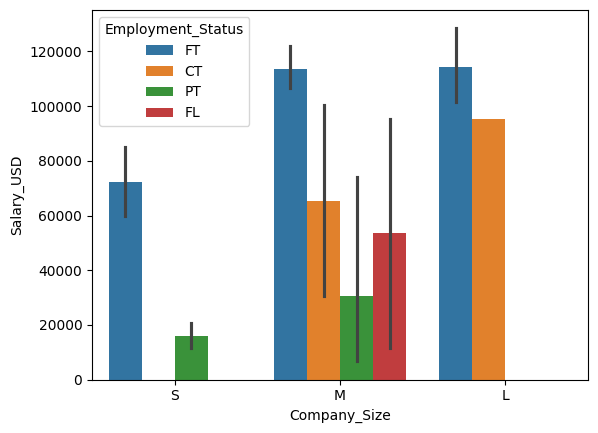

In [20]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

**Question
What is a reasonable hypothesis to generate based on this plot?**

Possible answers


- On average, small companies pay part-time employees less than large companies.

- Freelancers earn more at medium-sized companies compared to small or large companies.

- --On average, large companies pay contractors more than medium-sized companies.

- No hypotheses can be generated from this plot.